In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.9MB/s 
     |████████████████████████████████| 194kB 13.5MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 1.2MB 11.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *
import pathlib

In [22]:
reversal_stock_patterns = 'DoubleBottom','DoubleTop','ReversalFallingWedge','HeadAndShoulders','InverseHeadAndShoulders','ReversalRisingWedge','ContinuousFalling','ContinuousRising'

In [23]:
path = Path('/content/gdrive/MyDrive/Stocker2')
#url = "/content/gdrive/MyDrive/Peoplespace_Images/ReversalPatterns/"
#path = pathlib.Path(url)

In [24]:
fns = get_image_files(path)
fns

(#1534) [Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/6.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/3.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/11.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/4.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/5.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/1.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/12.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/9.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/13.png'),Path('/content/gdrive/MyDrive/Stocker2/DoubleTop/25.png')...]

In [25]:
pattern = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [26]:
dls = pattern.dataloaders(path)

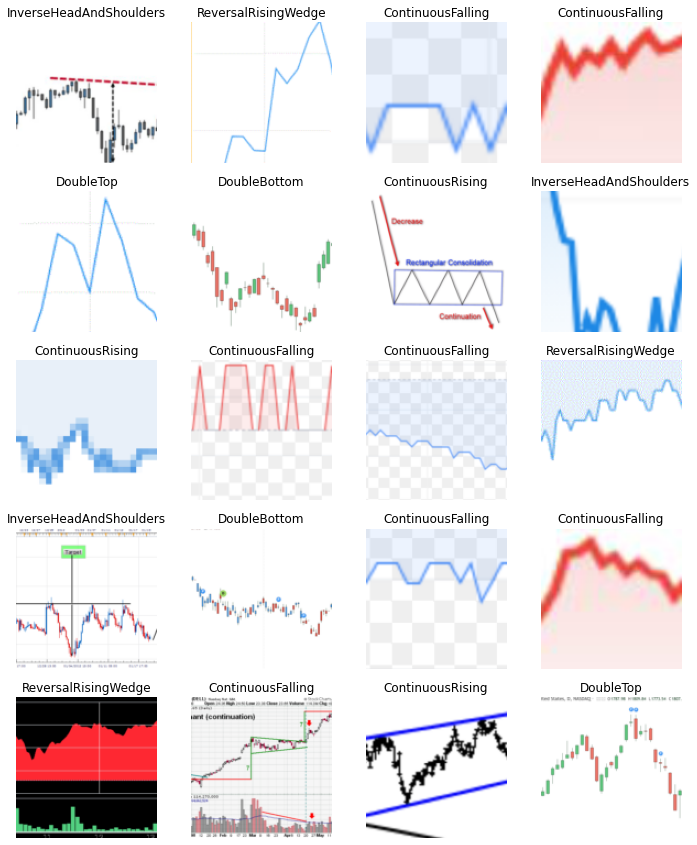

In [27]:
dls.valid.show_batch(max_n=20, nrows=5)

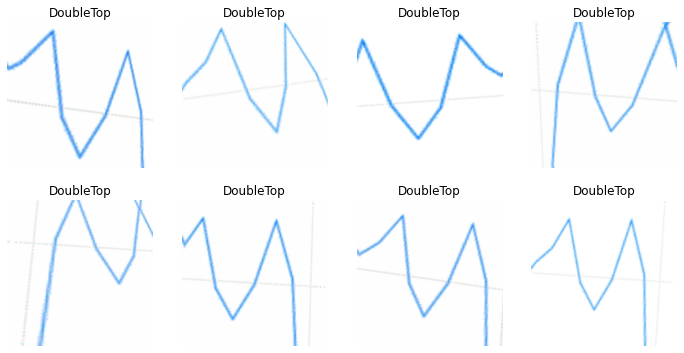

In [28]:
pattern = pattern.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pattern.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [29]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(80,0.9e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.970331,1.391704,0.323529,00:14


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.156915,0.807831,0.251634,00:16
1,0.919021,0.613897,0.202614,00:15
2,0.752623,0.495386,0.166667,00:15
3,0.626048,0.407987,0.133987,00:16
4,0.550099,0.394337,0.140523,00:16
5,0.487018,0.420396,0.127451,00:16
6,0.426426,0.608727,0.143791,00:16
7,0.397205,0.504173,0.150327,00:16
8,0.386328,0.796181,0.176471,00:16
9,0.395855,0.484163,0.133987,00:16


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

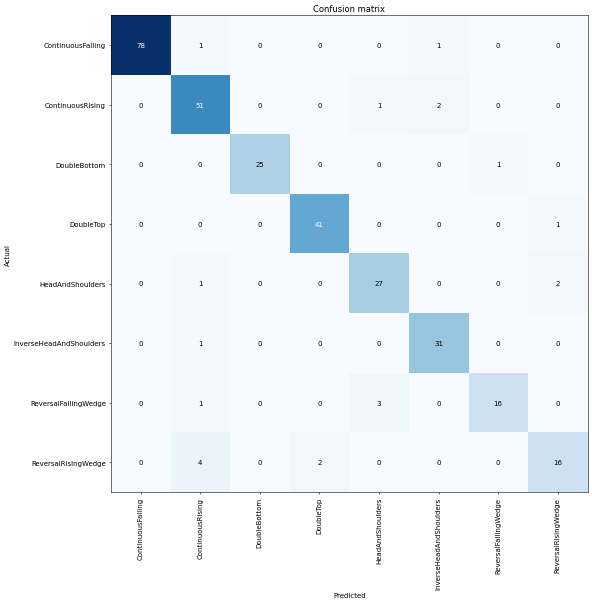

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=50)

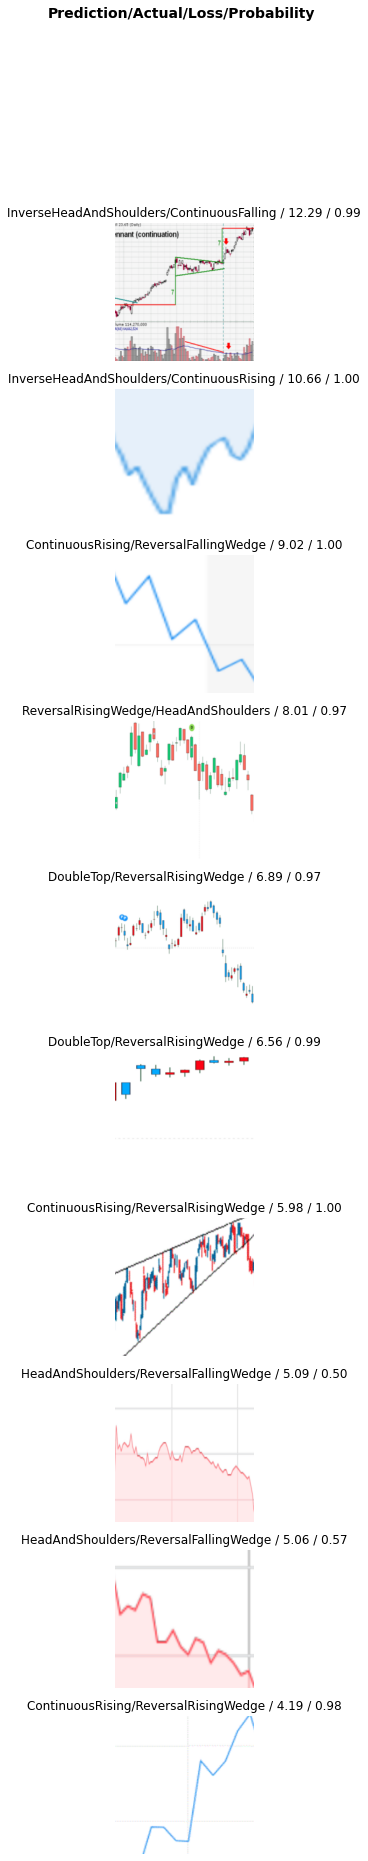

In [31]:
interp.plot_top_losses(10, nrows=10)

In [32]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [33]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [37]:
learn.export()

In [38]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [39]:
learn_inf = load_learner(path/'export.pkl')

In [40]:
learn_inf.dls.vocab

['ContinuousFalling', 'ContinuousRising', 'DoubleBottom', 'DoubleTop', 'HeadAndShoulders', 'InverseHeadAndShoulders', 'ReversalFallingWedge', 'ReversalRisingWedge']